#Logostic Regression

y=1/(e^(-x))
y=1/(e^(-(mx1+nx2+px3+..+z)))


age: Age of the individual (numeric).
job: Type of job (categorical).
marital: Marital status (categorical).
education: Level of education (categorical).
default: Whether they have credit in default (binary categorical).
housing: Whether they have a housing loan (binary categorical).
loan: Whether they have a personal loan (binary categorical).
contact: Type of communication (categorical).
month: Last contact month of the year (categorical).
day_of_week: Last contact day of the week (categorical).
duration: Duration of the last contact in seconds (numeric).
campaign: Number of contacts performed during this campaign for this client (numeric).
pdays: Number of days since the client was last contacted (numeric).
previous: Number of contacts performed before this campaign for this client (numeric).
poutcome: Outcome of the previous marketing campaign (categorical).
emp.var.rate: Employment variation rate (numeric).
cons.price.idx: Consumer price index (numeric).
cons.conf.idx: Consumer confidence index (numeric).
euribor3m: Euribor 3 month rate (numeric).
nr.employed: Number of employees (numeric).
y: Target variable indicating if the client subscribed to a term deposit (binary categorical).
If you have any specific questions or need help with analysis or modeling, feel free to ask!

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [209]:
df=pd.read_csv(r'C:/Users/Suga/Downloads/bank-additional-full.csv',sep=';')

In [211]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [215]:
df.duplicated().sum()

15

In [218]:
df.isnull().sum().sum()

76

In [220]:
df[df['marital'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41189,NaN,retired,NaN,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41192,74.0,retired,NaN,professional.course,NaN,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
df=df.dropna()

In [224]:
df.shape

(41190, 21)

In [226]:
df=df.drop_duplicates()

In [228]:
df.head().T

,0,1,2,3,4
age,56.0,57.0,37.0,40.0,56.0
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [230]:
results=[]
for i in df.columns:
    if df[i].dtypes=='object':
        print(f'{i}:{df[i].unique()}')
        #unique_values = df[i].unique()
        #results.append({'Column': i, 'Unique Values': unique_values})


job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital:['married' 'single' 'divorced' 'unknown']
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default:['no' 'unknown' 'yes']
housing:['no' 'yes' 'unknown']
loan:['no' 'yes' 'unknown']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


In [167]:

unique_values_df = pd.DataFrame(results)

In [75]:
unique_values_df.head()

,Column,Unique Values
0,job,"[housemaid, services, admin., blue-collar, tec..."
1,marital,"[married, single, divorced, unknown]"
2,education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
3,default,"[no, unknown, yes]"
4,housing,"[no, yes, unknown]"


In [87]:
df['month'].value_counts().reset_index()

,month,count
0,may,13767
1,jul,7169
2,aug,6176
3,jun,5318
4,nov,4101
5,apr,2631
6,oct,717
7,sep,570
8,mar,546
9,dec,182


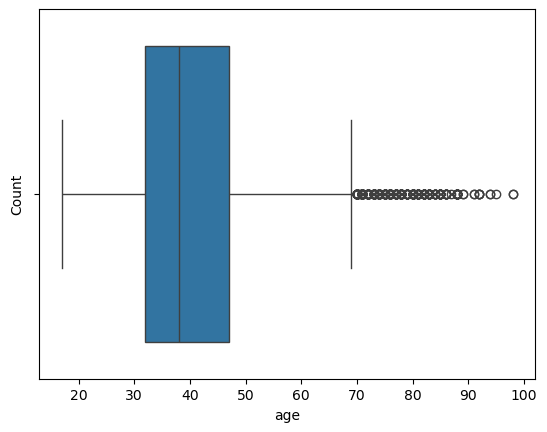

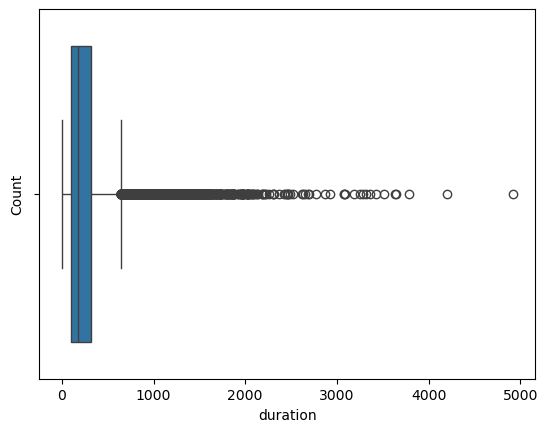

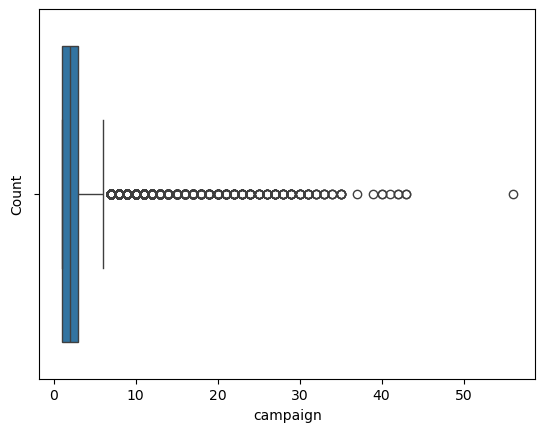

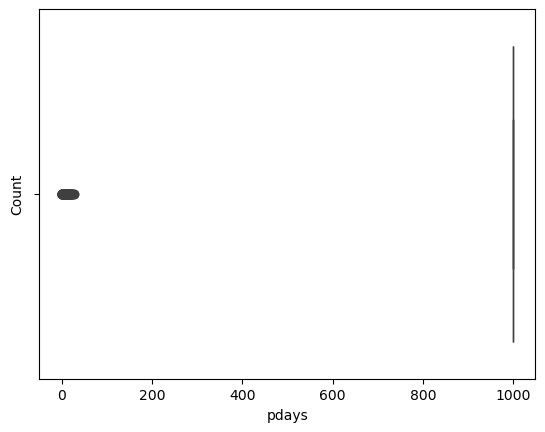

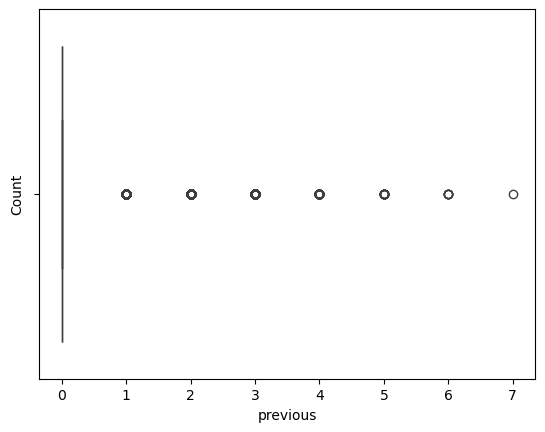

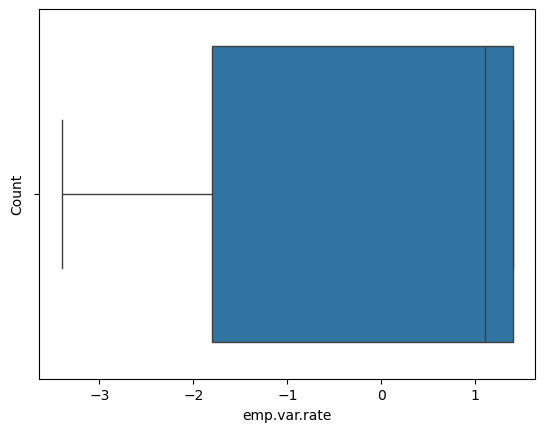

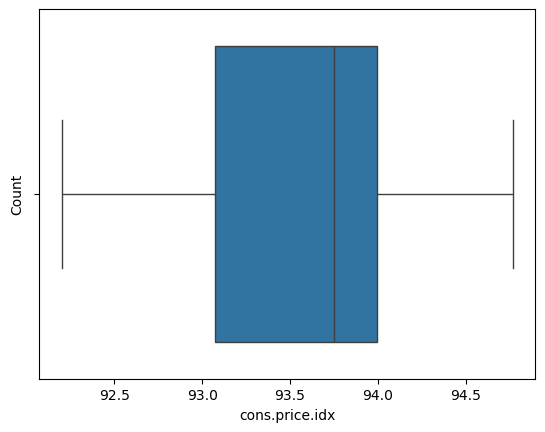

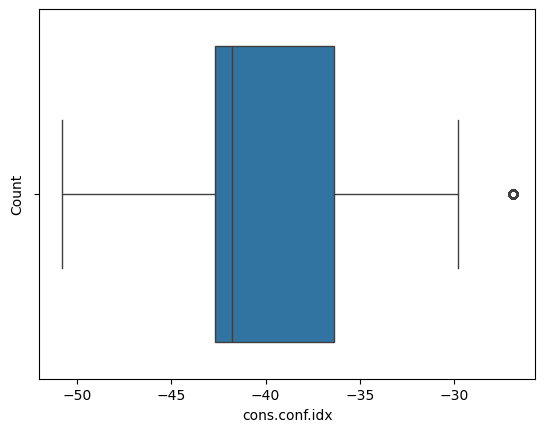

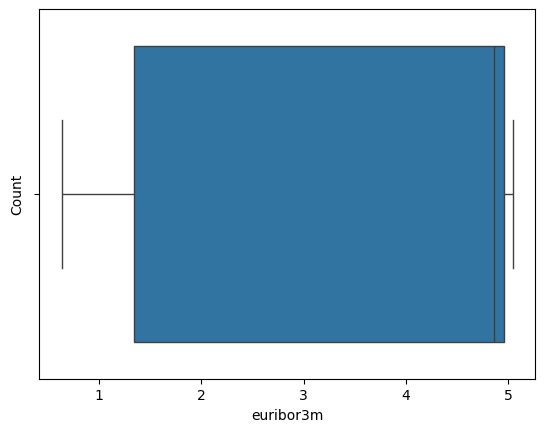

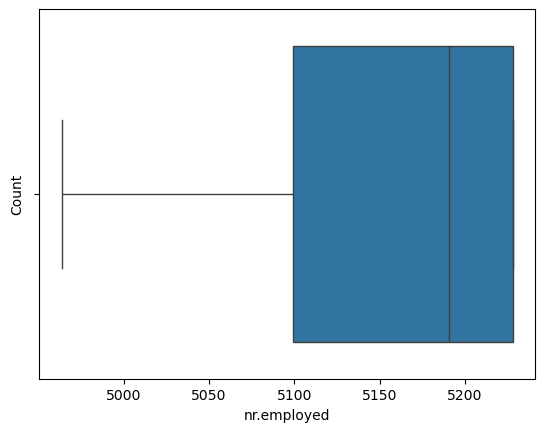

In [232]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(data=df,x=i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()


In [ ]:
Age,duration,campaign,- more outliers
pdays,previous,-- verify
con.conf.idx-- less outliers

In [91]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [175]:
col=['age','duration','campaign']

In [189]:
# checking percentage of outliers:

In [234]:
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    l=len(df[(df[i]>UL)|(df[i]<LL)])
    total_length=len(df)
    avg=l/total_length
    print(f'{i} outlier percentage: {avg*100}%')

age outlier percentage: 1.1389853559025669%
duration outlier percentage: 7.195764625883381%
campaign outlier percentage: 5.843067731986303%


In [242]:
#treating outliers:
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    df=df[(df[i]>=LL)&(df[i]<=UL)]

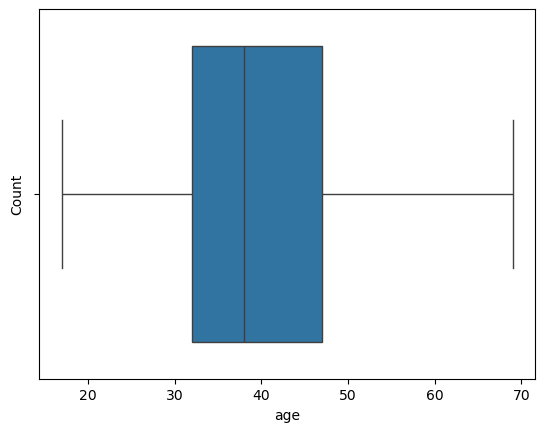

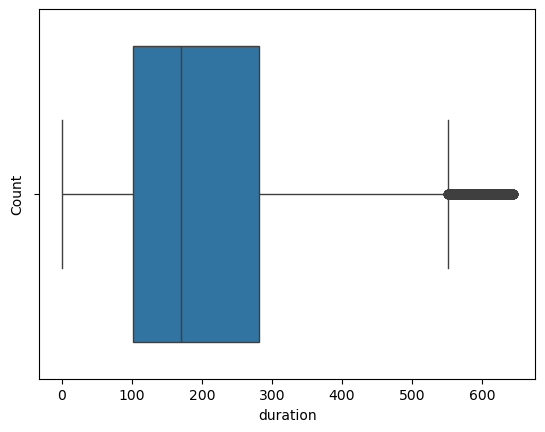

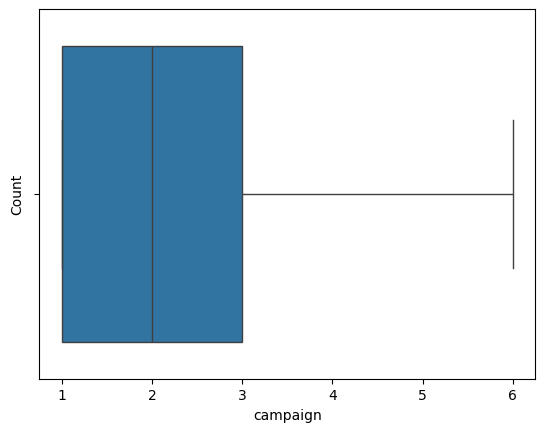

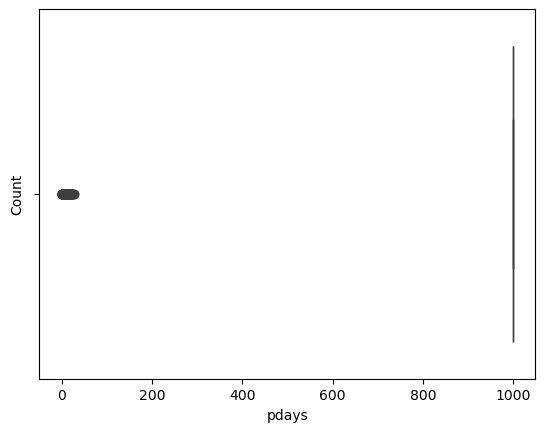

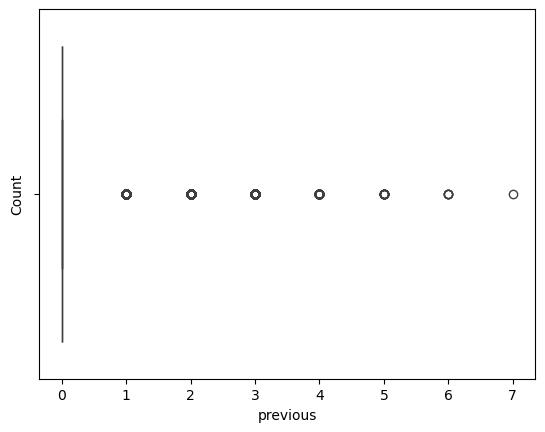

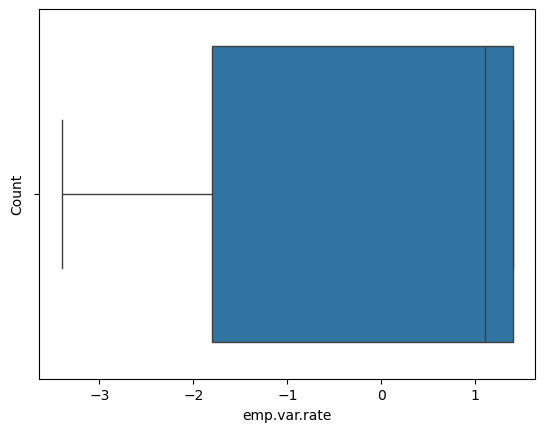

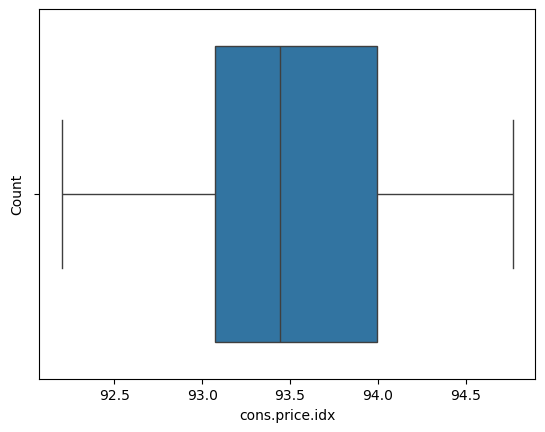

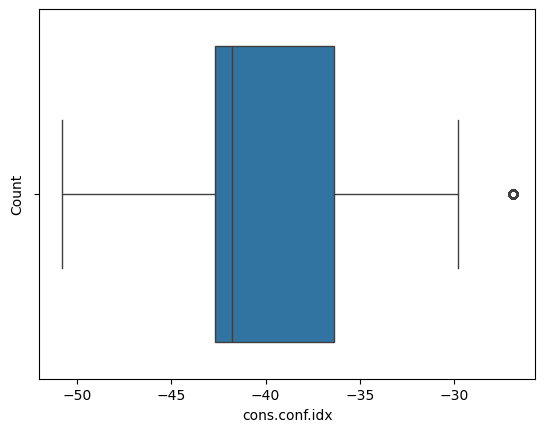

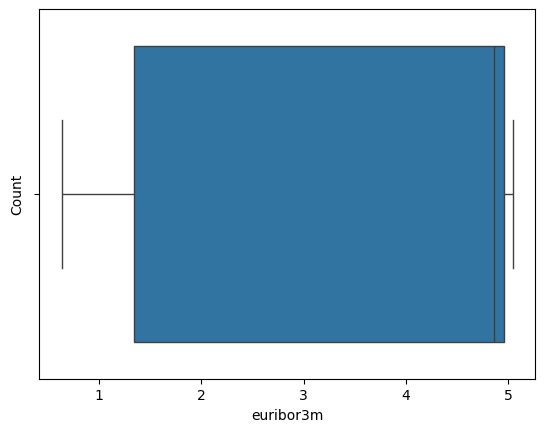

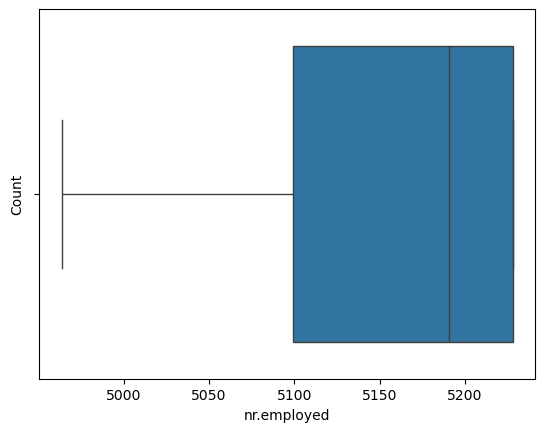

In [244]:
#After trerating outliers:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(data=df,x=i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()


In [103]:
df['pdays'].nunique()

27

<Axes: xlabel='pdays'>

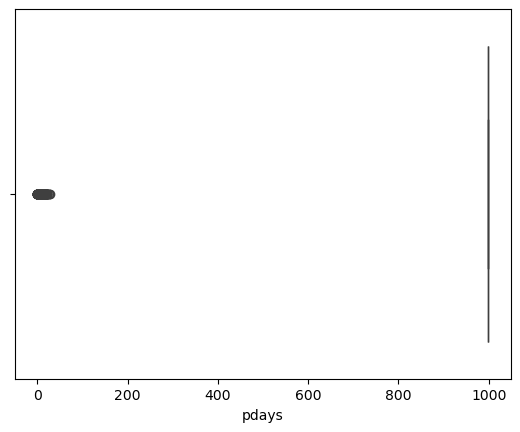

In [107]:
sns.boxplot(data=df,x='pdays')

In [105]:
df['pdays'].value_counts()--
# since 999 is extreme values, we check if its an outlier from this 999 valueble info its not outlier.. so we included it

pdays
999.0    34256
3.0        367
6.0        342
4.0        105
9.0         54
2.0         51
12.0        50
7.0         48
10.0        44
5.0         38
13.0        28
1.0         23
11.0        22
15.0        20
14.0        15
8.0         14
0.0         13
16.0        10
17.0         8
18.0         6
22.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
19.0         1
Name: count, dtype: int64

In [101]:
df['previous'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [109]:
df['previous'].value_counts()

previous
0.0    30562
1.0     4072
2.0      630
3.0      182
4.0       57
5.0       16
6.0        4
7.0        1
Name: count, dtype: int64

<Axes: xlabel='previous'>

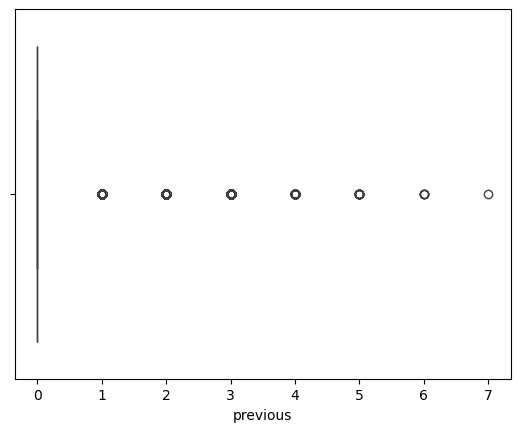

In [111]:
sns.boxplot(data=df,x='previous')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35524 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35524 non-null  float64
 1   job             35524 non-null  object 
 2   marital         35524 non-null  object 
 3   education       35524 non-null  object 
 4   default         35524 non-null  object 
 5   housing         35524 non-null  object 
 6   loan            35524 non-null  object 
 7   contact         35524 non-null  object 
 8   month           35524 non-null  object 
 9   day_of_week     35524 non-null  object 
 10  duration        35524 non-null  float64
 11  campaign        35524 non-null  float64
 12  pdays           35524 non-null  float64
 13  previous        35524 non-null  float64
 14  poutcome        35524 non-null  object 
 15  emp.var.rate    35524 non-null  float64
 16  cons.price.idx  35524 non-null  float64
 17  cons.conf.idx   35524 non-null  floa

In [250]:
df.shape

(35524, 21)

In [256]:
from sklearn.preprocessing import LabelEncoder

In [258]:
le=LabelEncoder()

In [264]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
        print(le.classes_)

['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


In [266]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [268]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.015290,-0.392531,-0.102054,0.189206,-0.005844,-0.006624,0.033616,-0.029627,-0.024274,...,0.011977,0.002573,-0.020315,0.017957,0.070158,0.036397,0.101927,0.083359,0.067999,-0.016447
job,-0.015290,1.000000,0.031393,0.139842,-0.031970,0.006921,-0.012173,-0.022845,-0.032872,0.000234,...,-0.009838,-0.026881,0.019047,0.010867,-0.004554,-0.011919,0.049572,-0.004210,-0.015615,0.026923
marital,-0.392531,0.031393,1.000000,0.106671,-0.083562,0.012674,0.005000,-0.064530,-0.009073,0.004074,...,-0.011805,-0.046776,0.048321,0.003029,-0.100634,-0.066372,-0.026080,-0.108799,-0.107096,0.066957
education,-0.102054,0.139842,0.106671,1.000000,-0.193372,0.013816,0.003840,-0.111086,-0.083280,-0.019382,...,-0.002194,-0.054231,0.044335,0.018222,-0.059788,-0.090333,0.087521,-0.051960,-0.060415,0.083931
default,0.189206,-0.031970,-0.083562,-0.193372,1.000000,-0.013446,0.000967,0.132260,-0.020556,-0.006475,...,0.025765,0.083477,-0.104443,0.022901,0.205509,0.167192,0.028758,0.196778,0.192710,-0.114878
housing,-0.005844,0.006921,0.012674,0.013816,-0.013446,1.000000,0.042699,-0.081802,-0.020475,0.002010,...,-0.008893,-0.008015,0.019471,-0.011827,-0.057544,-0.077491,-0.034820,-0.056930,-0.043317,0.012952
loan,-0.006624,-0.012173,0.005000,0.003840,0.000967,0.042699,1.000000,-0.005838,-0.004266,-0.010736,...,0.012771,0.002669,-0.000692,-0.004410,0.002482,0.000484,-0.012200,-0.000420,0.002575,-0.009400
contact,0.033616,-0.022845,-0.064530,-0.111086,0.132260,-0.081802,-0.005838,1.000000,0.279687,-0.007728,...,0.045871,0.117435,-0.215961,0.124811,0.398800,0.599737,0.264749,0.403556,0.268377,-0.148575
month,-0.029627,-0.032872,-0.009073,-0.083280,-0.020556,-0.020475,-0.004266,0.279687,1.000000,0.035867,...,-0.040158,-0.043876,0.101996,-0.068642,-0.168352,0.001242,0.004821,-0.105619,-0.210721,-0.002412
day_of_week,-0.024274,0.000234,0.004074,-0.019382,-0.006475,0.002010,-0.010736,-0.007728,0.035867,1.000000,...,-0.052406,-0.010670,-0.002445,0.018881,0.033230,0.005724,0.040088,0.039708,0.029786,0.012713


<Axes: >

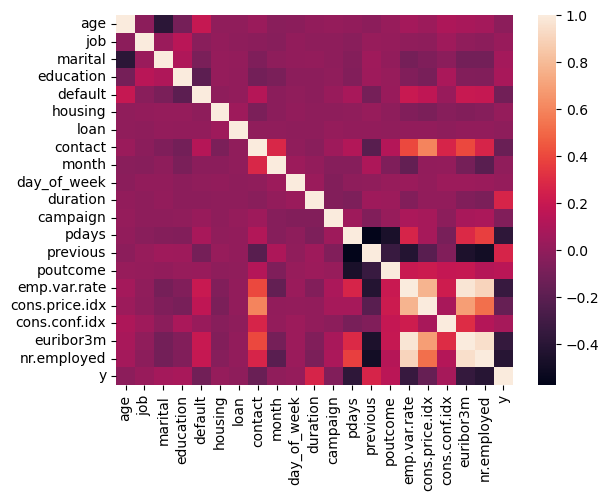

In [274]:
sns.heatmap(df.corr())

In [276]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [278]:
# Highly colerrated -  emp.var.rate,  euribor3m,nr.employed, -- this gives multicollinearity

#have to multicollinearity- causes overfitting, incereses biases when predicting

#VIF- used for regression task, assumes data is independent of each other, features are independent each feature here

In [282]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [286]:
X=df.drop('y',axis=1)
y=df['y']

In [294]:
X.shape

(35524, 20)

In [301]:
# vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns) ]

In [297]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [299]:
vif

,VIF Factor,features
0,21.983939,age
1,2.102212,job
2,5.709721,marital
3,4.559136,education
4,1.410352,default
5,2.211341,housing
6,1.207792,loan
7,2.895436,contact
8,6.791264,month
9,3.100085,day_of_week


In [303]:
X=X.drop('nr.employed',axis=1)

In [309]:
#2nd vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [323]:
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
16,713.780381,cons.price.idx
12,168.871404,pdays
18,130.324178,euribor3m
17,111.493219,cons.conf.idx
14,34.173652,poutcome
15,23.106507,emp.var.rate
0,21.977802,age
13,5.986218,previous
8,5.839441,month
2,5.708967,marital


In [325]:
X=X.drop('cons.price.idx',axis=1)

In [327]:
#3nd vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [333]:
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
12,91.854356,pdays
17,91.272541,euribor3m
16,73.500486,cons.conf.idx
0,20.846463,age
14,17.249264,poutcome
15,16.764793,emp.var.rate
8,5.795648,month
2,5.558822,marital
3,4.504387,education
11,3.587255,campaign


In [335]:
X=X.drop('pdays',axis=1)

In [337]:
# 4th vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [343]:
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
16,60.310839,euribor3m
15,37.953137,cons.conf.idx
0,19.991762,age
14,12.448933,emp.var.rate
13,7.971243,poutcome
8,5.749566,month
2,5.432713,marital
3,4.451605,education
11,3.567956,campaign
10,3.187592,duration


In [345]:
X=X.drop('euribor3m',axis=1)

In [347]:
# 5th vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [353]:
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
15,29.853460,cons.conf.idx
0,16.709534,age
13,7.821194,poutcome
8,5.237612,month
2,5.196556,marital
3,4.285479,education
11,3.560500,campaign
10,3.178848,duration
9,3.031676,day_of_week
7,2.255048,contact


In [355]:
X=X.drop('cons.conf.idx',axis=1)

In [357]:
# 6th vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [359]:
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,10.997772,age
13,7.539986,poutcome
8,4.931891,month
2,4.372245,marital
3,4.190396,education
11,3.391751,campaign
10,3.107887,duration
9,2.970856,day_of_week
7,2.234303,contact
5,2.160794,housing


In [361]:
X=X.drop('age',axis=1)

In [363]:
# 7th vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [365]:
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
12,6.443348,poutcome
7,4.655818,month
1,4.351899,marital
2,4.010634,education
10,3.190302,campaign
9,2.990108,duration
8,2.888475,day_of_week
6,2.233089,contact
4,2.111482,housing
0,2.053544,job


In [371]:
X=X.drop('poutcome',axis=1)

In [373]:
# 8th vif
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['features']=X.columns

In [375]:
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
7,4.534000,month
1,4.141915,marital
2,3.793751,education
10,3.067461,campaign
9,2.838919,duration
8,2.804667,day_of_week
6,2.218067,contact
4,2.079797,housing
0,2.034169,job
12,1.543584,emp.var.rate


In [377]:
X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1


In [379]:
# here afer VIF, we dropped {'nr.employed','cons.conf.idx',euribor3m,cons.price.idx,age,pdays }

In [395]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [399]:
X_train.shape

(28419, 13)

In [403]:
y_train.shape

(28419,)

In [415]:
lg=LogisticRegression(max_iter=1000)

In [417]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [419]:
y_pred=lg.predict(X_test)

In [421]:
from sklearn.metrics import classification_report

In [423]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6499
           1       0.51      0.23      0.32       606

    accuracy                           0.92      7105
   macro avg       0.72      0.60      0.64      7105
weighted avg       0.90      0.92      0.90      7105

